## Assignment 1

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

bCancer = pd.read_csv('Breast Cancer METABRIC.csv')
print(bCancer.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

In [2]:
bCancer.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [3]:
#filtering out null values and columns that are not needed
bCancer.dropna(axis=0,inplace=True)
bCancer.drop('Type of Breast Surgery',axis=1,inplace=True) #type of surgery is not important to answering my question
bCancer.drop('Cancer Type',axis=1,inplace=True) #generalizing breast cancer to answer my question 
bCancer.drop('Patient ID',axis=1,inplace=True) #not relevant to my question
bCancer.drop('Cancer Type Detailed',axis=1,inplace=True) #generalizing breast cancer to answer my question
bCancer.drop('Cohort',axis=1,inplace=True) #not relevant to my question
bCancer.drop('3-Gene classifier subtype',axis=1,inplace=True) #not relevant to my question
bCancer.drop('Neoplasm Histologic Grade',axis=1,inplace=True) #not relevant to my question
bCancer.drop('HER2 status measured by SNP6',axis=1,inplace=True) #not relevant to my question
bCancer.drop('Tumor Other Histologic Subtype',axis=1,inplace=True) #not relevant to my question
bCancer.drop('Pam50 + Claudin-low subtype',axis=1,inplace=True) #not relevant to my question
bCancer.drop('Inferred Menopausal State',axis=1,inplace=True) #not relevant to my question
bCancer.drop('Integrative Cluster',axis=1,inplace=True) #not relevant to my question
bCancer.drop('Primary Tumor Laterality',axis=1,inplace=True) #not relevant to my question
bCancer.drop('Lymph nodes examined positive',axis=1,inplace=True) #not relevant to my question
bCancer.drop('Mutation Count',axis=1,inplace=True) #not relevant to my question
bCancer.drop('Nottingham prognostic index',axis=1,inplace=True) #not relevant to my question
bCancer.drop('Oncotree Code',axis=1,inplace=True) #not relevant to my question
bCancer.drop("Patient's Vital Status",axis=1,inplace=True) #not relevant to my question

In [4]:
bCancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1092 entries, 1 to 1743
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age at Diagnosis              1092 non-null   float64
 1   Cellularity                   1092 non-null   object 
 2   Chemotherapy                  1092 non-null   object 
 3   ER status measured by IHC     1092 non-null   object 
 4   ER Status                     1092 non-null   object 
 5   HER2 Status                   1092 non-null   object 
 6   Hormone Therapy               1092 non-null   object 
 7   Overall Survival (Months)     1092 non-null   float64
 8   Overall Survival Status       1092 non-null   object 
 9   PR Status                     1092 non-null   object 
 10  Radio Therapy                 1092 non-null   object 
 11  Relapse Free Status (Months)  1092 non-null   float64
 12  Relapse Free Status           1092 non-null   object 
 13  Sex     

In [5]:
bCancer.head()

,Age at Diagnosis,Cellularity,Chemotherapy,ER status measured by IHC,ER Status,HER2 Status,Hormone Therapy,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,Tumor Size,Tumor Stage
1,43.19,High,No,Positve,Positive,Negative,Yes,84.633333,Living,Positive,Yes,83.52,Not Recurred,Female,10.0,1.0
4,76.97,High,Yes,Positve,Positive,Negative,Yes,41.366667,Deceased,Positive,Yes,18.55,Recurred,Female,40.0,2.0
5,78.77,Moderate,No,Positve,Positive,Negative,Yes,7.800000,Deceased,Positive,Yes,2.89,Recurred,Female,31.0,4.0
10,86.41,Moderate,No,Positve,Positive,Negative,Yes,36.566667,Deceased,Negative,Yes,36.09,Not Recurred,Female,16.0,2.0
11,84.22,High,No,Negative,Positive,Negative,No,36.266667,Deceased,Negative,No,35.79,Recurred,Female,28.0,2.0


In [6]:
#changing string values to numerial values
bCancer.replace('High',3,inplace=True)
bCancer.replace('Moderate',2,inplace=True)
bCancer.replace('Low',1,inplace=True)
bCancer.replace('Yes',1,inplace=True)
bCancer.replace('No',0,inplace=True)
bCancer.replace('Positive',1,inplace=True)
bCancer.replace('Positve',1,inplace=True)
bCancer.replace('Negative',0,inplace=True)
bCancer.replace('Living', 1, inplace=True)
bCancer.replace('Deceased', 0, inplace=True)
bCancer.replace('Recurred',1,inplace=True)
bCancer.replace('Not Recurred',0,inplace=True)
bCancer.replace('Female',1,inplace=True)
bCancer.replace('Male',0,inplace=True)

/var/folders/8k/vw5fdwlj1mb3j3zm7ckp75cm0000gn/T/ipykernel_22937/2657122603.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bCancer.replace('Low',1,inplace=True)
/var/folders/8k/vw5fdwlj1mb3j3zm7ckp75cm0000gn/T/ipykernel_22937/2657122603.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bCancer.replace('No',0,inplace=True)
/var/folders/8k/vw5fdwlj1mb3j3zm7ckp75cm0000gn/T/ipykernel_22937/2657122603.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old b

In [7]:
bCancer.head()

,Age at Diagnosis,Cellularity,Chemotherapy,ER status measured by IHC,ER Status,HER2 Status,Hormone Therapy,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,Tumor Size,Tumor Stage
1,43.19,3,0,1,1,0,1,84.633333,1,1,1,83.52,0,1,10.0,1.0
4,76.97,3,1,1,1,0,1,41.366667,0,1,1,18.55,1,1,40.0,2.0
5,78.77,2,0,1,1,0,1,7.800000,0,1,1,2.89,1,1,31.0,4.0
10,86.41,2,0,1,1,0,1,36.566667,0,0,1,36.09,0,1,16.0,2.0
11,84.22,3,0,0,1,0,0,36.266667,0,0,0,35.79,1,1,28.0,2.0


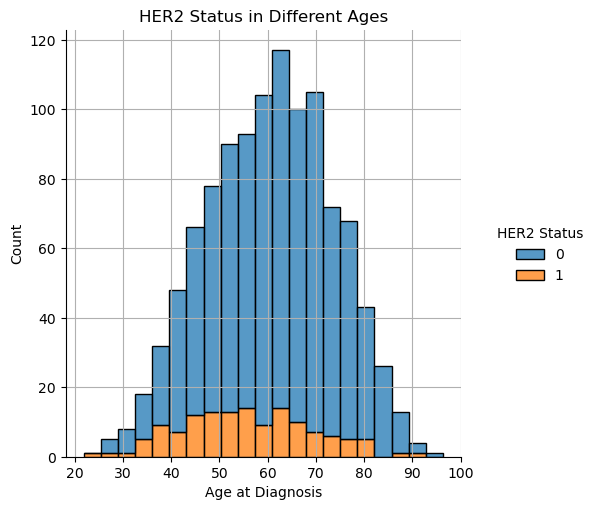

In [8]:
#https://seaborn.pydata.org/tutorial/function_overview.html

sns.displot(data=bCancer, x='Age at Diagnosis', hue='HER2 Status', multiple='stack')
plt.title('HER2 Status in Different Ages')
plt.grid(True)
plt.savefig('AgeVsHER2.png')

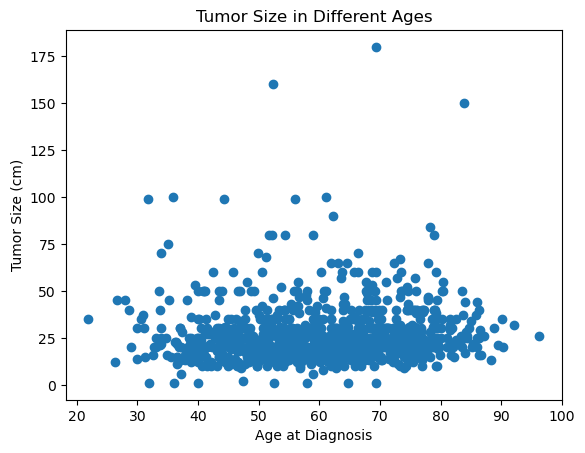

In [9]:
plt.scatter(bCancer['Age at Diagnosis'],bCancer['Tumor Size'])
plt.title('Tumor Size in Different Ages')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Tumor Size (cm)')
plt.savefig('AgeVsTumorSize.png')

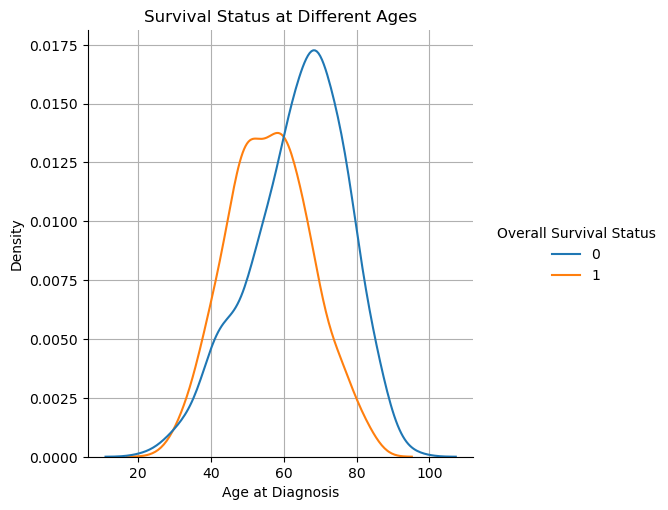

In [10]:
#https://seaborn.pydata.org/tutorial/function_overview.html
sns.displot(data=bCancer, x='Age at Diagnosis', hue='Overall Survival Status', kind='kde')
plt.title('Survival Status at Different Ages')
plt.grid(True)
plt.savefig('AgeVsSurvivalStatus.png')

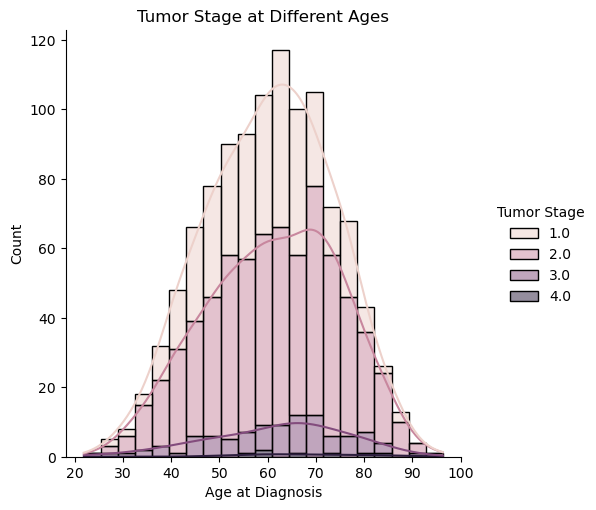

In [11]:
#https://seaborn.pydata.org/tutorial/function_overview.html
sns.displot(data=bCancer, x='Age at Diagnosis', hue='Tumor Stage',multiple='stack', kde=True)
plt.title("Tumor Stage at Different Ages")
plt.savefig('AgeVsTumorStage.png')

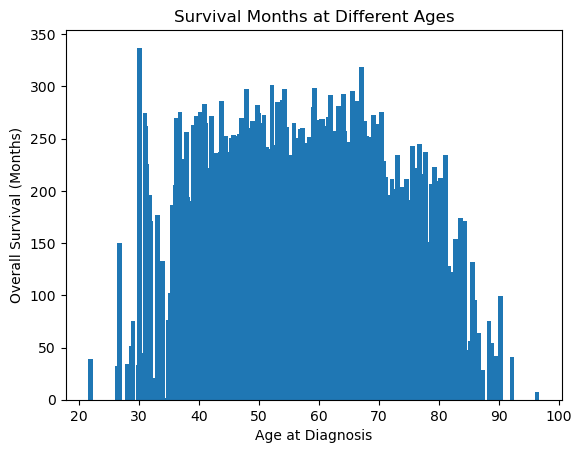

In [12]:
# age and overall survival months
plt.bar(bCancer['Age at Diagnosis'],bCancer['Overall Survival (Months)'])
plt.title('Survival Months at Different Ages')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Overall Survival (Months)')
plt.savefig('AgeVsSurvivalMonths.png')

In [13]:
bCancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1092 entries, 1 to 1743
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age at Diagnosis              1092 non-null   float64
 1   Cellularity                   1092 non-null   int64  
 2   Chemotherapy                  1092 non-null   int64  
 3   ER status measured by IHC     1092 non-null   int64  
 4   ER Status                     1092 non-null   int64  
 5   HER2 Status                   1092 non-null   int64  
 6   Hormone Therapy               1092 non-null   int64  
 7   Overall Survival (Months)     1092 non-null   float64
 8   Overall Survival Status       1092 non-null   int64  
 9   PR Status                     1092 non-null   int64  
 10  Radio Therapy                 1092 non-null   int64  
 11  Relapse Free Status (Months)  1092 non-null   float64
 12  Relapse Free Status           1092 non-null   int64  
 13  Sex     

In [14]:
x=bCancer.drop('Overall Survival Status',axis=1) 
y=bCancer['Overall Survival Status'].values

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=87)

In [16]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
predictions=logmodel.predict(x_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
logmodel=LogisticRegression(max_iter=2000)
logmodel.fit(x_train,y_train)
predictions=logmodel.predict(x_test)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       175
           1       0.82      0.78      0.80       153

    accuracy                           0.82       328
   macro avg       0.82      0.81      0.82       328
weighted avg       0.82      0.82      0.82       328



In [19]:
bCancer.head()

,Age at Diagnosis,Cellularity,Chemotherapy,ER status measured by IHC,ER Status,HER2 Status,Hormone Therapy,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,Tumor Size,Tumor Stage
1,43.19,3,0,1,1,0,1,84.633333,1,1,1,83.52,0,1,10.0,1.0
4,76.97,3,1,1,1,0,1,41.366667,0,1,1,18.55,1,1,40.0,2.0
5,78.77,2,0,1,1,0,1,7.800000,0,1,1,2.89,1,1,31.0,4.0
10,86.41,2,0,1,1,0,1,36.566667,0,0,1,36.09,0,1,16.0,2.0
11,84.22,3,0,0,1,0,0,36.266667,0,0,0,35.79,1,1,28.0,2.0


In [20]:
myTest = {
    'Age at Diagnosis': [30],
    'Cellularity': [2],
    'Chemotherapy': [0],
    'ER status measured by IHC': [1],
    'ER Status': [1],
    'HER2 Status': [0],
    'Hormone Therapy': [1],
    'Overall Survival (Months)': [127],
    'PR Status': [1],
    'Radio Therapy': [1],
    'Relapse Free Status (Months)': [111],
    'Relapse Free Status': [0],
    'Sex': [1],
    'Tumor Size': [26],
    'Tumor Stage': [2]
}

df=pd.DataFrame(myTest)
print(logmodel.predict(df))

[1]


In [21]:
myTest2 = {
    'Age at Diagnosis': [40],
    'Cellularity': [2],
    'Chemotherapy': [0],
    'ER status measured by IHC': [1],
    'ER Status': [1],
    'HER2 Status': [0],
    'Hormone Therapy': [1],
    'Overall Survival (Months)': [127],
    'PR Status': [1],
    'Radio Therapy': [1],
    'Relapse Free Status (Months)': [111],
    'Relapse Free Status': [0],
    'Sex': [1],
    'Tumor Size': [26],
    'Tumor Stage': [2]
}

df=pd.DataFrame(myTest2)
print(logmodel.predict(df))

[1]


In [22]:
myTest3 = {
    'Age at Diagnosis': [50],
    'Cellularity': [2],
    'Chemotherapy': [0],
    'ER status measured by IHC': [1],
    'ER Status': [1],
    'HER2 Status': [0],
    'Hormone Therapy': [1],
    'Overall Survival (Months)': [127],
    'PR Status': [1],
    'Radio Therapy': [1],
    'Relapse Free Status (Months)': [111],
    'Relapse Free Status': [0],
    'Sex': [1],
    'Tumor Size': [26],
    'Tumor Stage': [2]
}

df=pd.DataFrame(myTest3)
print(logmodel.predict(df))

[1]


In [23]:
myTest4 = {
    'Age at Diagnosis': [20],
    'Cellularity': [2],
    'Chemotherapy': [0],
    'ER status measured by IHC': [1],
    'ER Status': [1],
    'HER2 Status': [0],
    'Hormone Therapy': [1],
    'Overall Survival (Months)': [127],
    'PR Status': [1],
    'Radio Therapy': [1],
    'Relapse Free Status (Months)': [111],
    'Relapse Free Status': [0],
    'Sex': [1],
    'Tumor Size': [26],
    'Tumor Stage': [2]
}

df=pd.DataFrame(myTest4)
print(logmodel.predict(df))

[1]


In [24]:
myTest5 = {
    'Age at Diagnosis': [80],
    'Cellularity': [2],
    'Chemotherapy': [0],
    'ER status measured by IHC': [1],
    'ER Status': [1],
    'HER2 Status': [0],
    'Hormone Therapy': [1],
    'Overall Survival (Months)': [127],
    'PR Status': [1],
    'Radio Therapy': [1],
    'Relapse Free Status (Months)': [111],
    'Relapse Free Status': [0],
    'Sex': [1],
    'Tumor Size': [26],
    'Tumor Stage': [2]
}

df=pd.DataFrame(myTest5)
print(logmodel.predict(df))

[0]
